# Python: Measurements & histograms

Here, we will explore how to make measurements and generate histograms with Python.

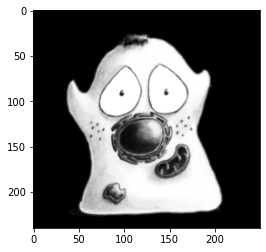

In [1]:
# Our usual default imports
import sys
sys.path.append('../../../')

from helpers import *
import matplotlib.pyplot as plt

# Read an image - we need to know the full path to wherever it is
im = load_image('happy_cell.tif')

# Show the image
plt.imshow(im, cmap='gray')
plt.show()

## Introduction to NumPy arrays

The images we are working with in Python are **NumPy arrays** - https://numpy.org

Rather than plotting the image with `plt.imshow`, we can also simply print its values.
Since there can be a *lot* of values (i.e. millions of pixels per image), only a few are shown by default.

In [2]:
print(im)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


If we want to know how many values are in an image, we can query its `shape`.

This returns the size in the order `(height, width)`.

In [3]:
print(im.shape)

(240, 250)


Whenever we have a 2D NumPy array, we can easily transpose it - which will switch the width and height values.

(250, 240)


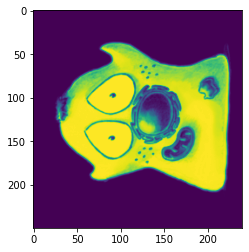

In [4]:
im2 = im.transpose()
print(im2.shape)
plt.imshow(im2)
plt.show()

## Calculating statistics

A more meaningful benefit of working with NumPy arrays, for our purposes at least, is that they enable us to calculate some summary statistics *extremely* easily.

For example, to compute the average (mean) pixel value we can simply use `im.mean()`.

In [5]:
im.mean()

23.031446

If that's the last thing we add to a code cell, then the result will be displayed in our notebook.

However, if we want to print multiple values - and multiple statistics - in quick succession we should use the `print` function again.

In [6]:
print(im.mean())
print(im.min())
print(im.max())
print(im.std())

23.031446
2.0
65.75
27.156355


### Formatting output

Things become more readable if we add some extra text, rather than just printing numbers.

One of the easiest ways to do this is to use an 'f-string', which is in the form `f'Some text {some_variable}`.

The part between the braces `{}` can be a calculation, and if you add `:.2f` at the end this will optionally limit the number of decimal places (here, to two).

In [7]:
print(f'Mean:     {im.mean()}')
print(f'Minimum:  {im.min():.1f}')
print(f'Maximum:  {im.max():.2f}')
print(f'Std.dev.: {im.std():.3f}')

Mean:     23.03144645690918
Minimum:  2.0
Maximum:  65.75
Std.dev.: 27.156


## Generating histograms

We can now try to generate image histograms, using `plt.hist`.

You might expect `plt.hist(im)` to work, just as `plt.imshow(im)` did previously.
However, the result can be a bit surprising.

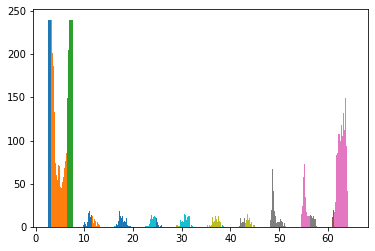

In [8]:
plt.hist(im)
plt.show()

The problem is that the image is 2D, and `plt.hist` is expecting just a single 1D list of values.
We can generate that with a call to `.flatten()`, and use the flattened array to create the histogram.

In [9]:
print(f'Shape before flatten(): {im.shape}')
im_flat = im.flatten()
print(f'Shape after flatten(): {im_flat.shape}')

Shape before flatten(): (240, 250)
Shape after flatten(): (60000,)


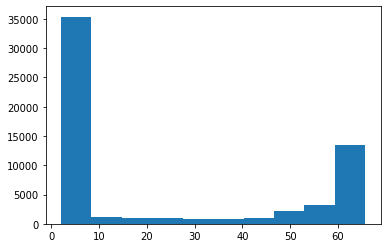

In [10]:
plt.hist(im_flat)
plt.show()

As with `plt.imshow`, we have lots of options to customize the histogram.
This includes the ability to set the color or number of histogram bins.

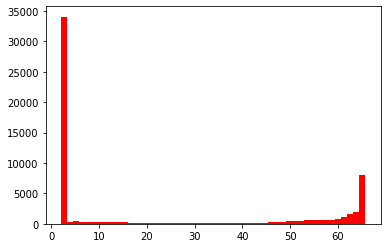

In [11]:
plt.hist(im.flatten(), bins=50, color='red')
plt.show()

> **Parentheses**
> 
> It may initially be confusing why we sometimes need parentheses `()` and sometimes we don't, e.g. `im.flatten()` vs. `im.shape`.
> 
> As a general rule, parentheses indicate that we're calling a method that *does* something (e.g. prints a value, calculates an average, flattens an array).
> 
> When we don't see parentheses, this indicates that we're accessing a field or property (e.g. the shape of an array).
> 
> In practice, the distinction can sometimes be a bit murky as you get deeper into Python - but it helps as a general guide.